In [1]:
!pip install dlib

In [2]:
def process_boxes(box):
  x_min = box.rect.left()
  y_min = box.rect.top()
  x_max = box.rect.right()
  y_max = box.rect.bottom()
  return x_min, y_min, x_max, y_max

# Face detect image

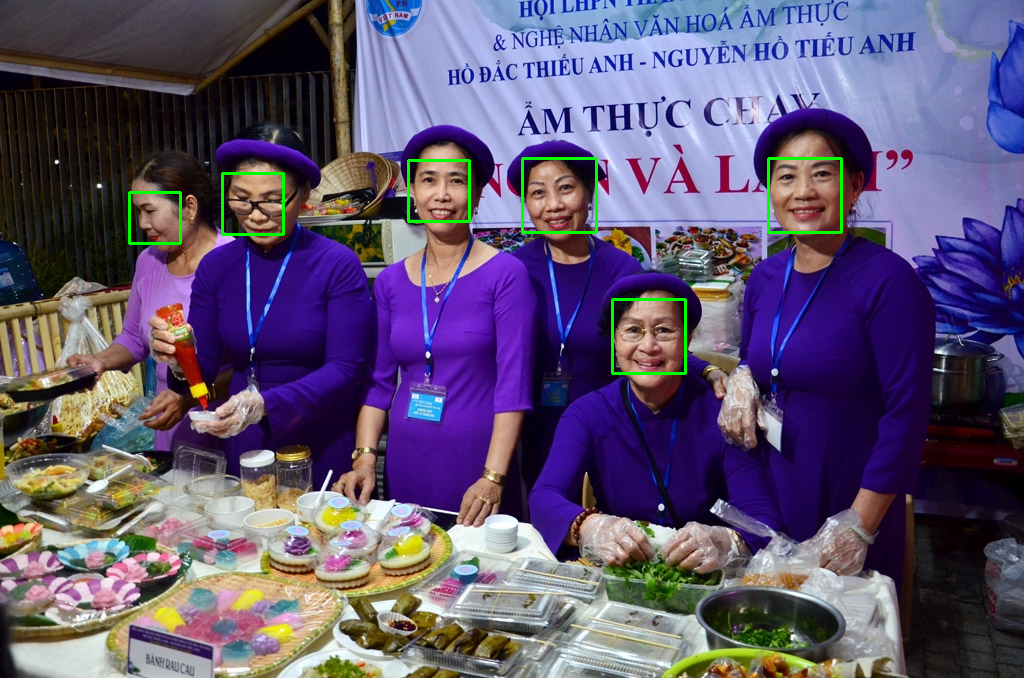

Total faces detected: 6
Total time taken: 71.721 seconds.
FPS: 0.014


In [3]:
import dlib
import cv2
import time
import os
from google.colab.patches import cv2_imshow

input_image_path = '/content/drive/MyDrive/Face_Detection_with_Dlib_using_CNN/inputs/image2.jpg'
upsample_factor = 3

image = cv2.imread(input_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

output_dir = "/content/drive/MyDrive/Face_Detection_with_Dlib_using_CNN/outputs"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

save_name = os.path.join(output_dir, f"{os.path.basename(input_image_path).split('.')[0]}_u{upsample_factor}.jpg")

detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Face_Detection_with_Dlib_using_CNN/mmod_human_face_detector.dat')

start = time.time()
if upsample_factor > 0:
    detect_boxes = detector(image_rgb, upsample_factor)
else:
    detect_boxes = detector(image_rgb)
end = time.time()

for box in detect_boxes:
    x1, y1, x2, y2, conf = (box.rect.left(), box.rect.top(), box.rect.right(), box.rect.bottom(), box.confidence)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image)
cv2.imwrite(save_name, image)

print(f"Total faces detected: {len(detect_boxes)}")
print(f"Total time taken: {end-start:.3f} seconds.")
print(f"FPS: {1/(end-start):.3f}")


# Face detect video

In [13]:
import dlib
import cv2
import time
from google.colab.patches import cv2_imshow

model_path = "/content/drive/MyDrive/Face_Detection_with_Dlib_using_CNN/mmod_human_face_detector.dat"

input_video_path = '/content/drive/MyDrive/Face_Detection_with_Dlib_using_CNN/inputs/Phoenix (ft. Cailin Russo and Chrissy Costanza) - Worlds 2019 - League of Legends.mp4'
upsample_factor = 1

# # Initialize the Dlib face detection kit
detector = dlib.cnn_face_detection_model_v1(model_path)

# Open video
cap = cv2.VideoCapture(input_video_path)

if not cap.isOpened():
    print('Error opening video file. Please check file path...')

# Size of the frame
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Path to save result
save_name = f"/content/drive/MyDrive/Face_Detection_with_Dlib_using_CNN/outputs{input_video_path.split('/')[-1].split('.')[0]}_u{upsample_factor}.mp4"

# Initialize the VideoWriter object
out = cv2.VideoWriter(save_name,
                      cv2.VideoWriter_fourcc(*'mp4v'), 30,
                      (frame_width, frame_height))

frame_count = 0
# Follow the total frame per second
total_fps = 0

while cap.isOpened():
    # Read each frame of the video
    ret, frame = cap.read()
    if ret:
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect the faces on the frames
        start = time.time()
        detected_boxes = detector(image_rgb, upsample_factor)
        end = time.time()


        fps = 1 / (end - start)

        total_fps += fps

        frame_count += 1

        # Draw the boxs around the faces
        for box in detected_boxes:
            x, y, w, h = (box.rect.left(), box.rect.top(), box.rect.width(), box.rect.height())
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Show fps on the frames
        cv2.putText(frame, f"{fps:.3f} FPS", (15, 30), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 255, 0), 2)
        # Show numbers of the frames
        # cv2_imshow(frame)
        out.write(frame)
    else:
        break

# Release VideoCapture and Videowriter
cap.release()
out.release()
cv2.destroyAllWindows()

#  Avg FPS
avg_fps = total_fps / frame_count
print(f"Average FPS: {avg_fps:.3f}")


Average FPS: 3.113
